In [1]:
import numpy as np
import pylab as pl
from numpy import fft
from temp import ForestFireTemperatureSimulator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fourierExtrapolation(t,x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    # t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [3]:
def fourierExtrapolation2D(t,x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    # t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [4]:
def normalize_signal( signal):
        """
        Normalize the signal to the range [0, 1].
        """
        min_val = np.min(signal)
        max_val = np.max(signal)
        if max_val==min_val:
            normalized_signal=np.ones_like(signal)
        else:
            normalized_signal = (signal - min_val) / (max_val - min_val)
        return normalized_signal

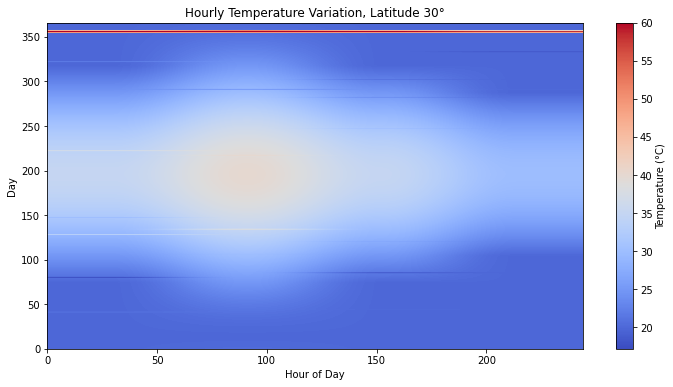

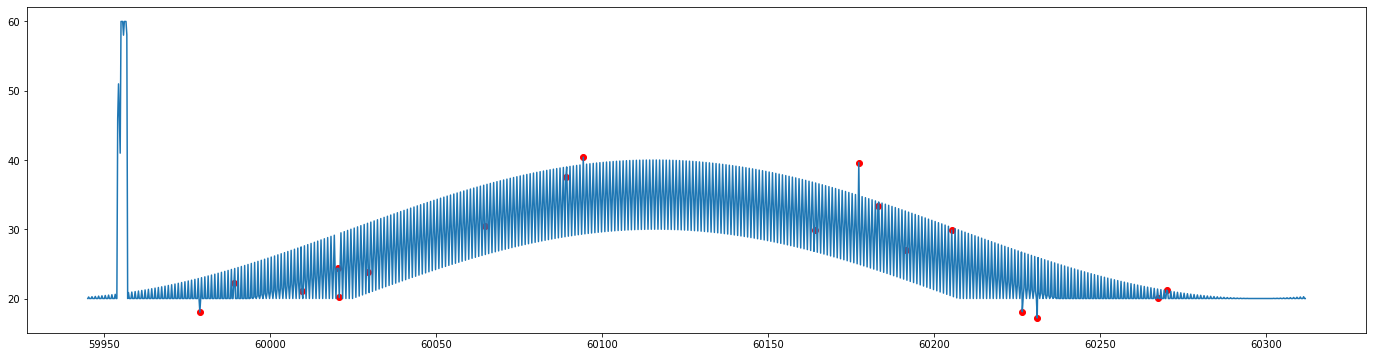

In [5]:
# Example of using the advanced simulator with a forest fire
latitude = 30  # Specify the latitude of the point on Earth
target_average_temperature = 25  # Specify the target average temperature
min_temperature = 20  # Specify the minimum temperature
max_temperature = 60  # Specify the maximum temperature
oscillation_factor = 5  # Specify the oscillation factor
outlier_probability = 0.01  # Specify the probability of having an outlier
outlier_magnitude = 5  # Specify the magnitude of the outliers
fire_start_day = 10  # Specify the day when the forest fire starts (during summer)
fire_duration_days = 3  # Specify the duration of the forest fire
fire_magnitude = 50  # Specify the magnitude of the temperature spike during the fire
fire_smoothness = 3  # Specify the smoothness of the fire spike

forest_fire_simulator = ForestFireTemperatureSimulator(
    latitude, target_average_temperature, min_temperature, max_temperature,
    oscillation_factor, outlier_probability, outlier_magnitude,
    fire_start_day, fire_duration_days, fire_magnitude, fire_smoothness
)

# Simulate temperature for 265 days
num_days_to_simulate = 366
output = forest_fire_simulator.simulate_temperature_for_days(num_days_to_simulate)
# Plotting
temps_vs_hours_of_doy = output['temps_vs_hours_of_doy']

fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(temps_vs_hours_of_doy, cmap='coolwarm', aspect='auto', extent=[0, 244, 0, num_days_to_simulate])
ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day')
cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()
# Plotting
temps,mjds = output['temperature_time_series'].items()
outliers = output['outliers']
nmjds = np.array(mjds[1])[outliers]
ntmps = np.array(temps[1])[outliers]
# plt.plot(mjds[1],temps[1])
fig, ax = plt.subplots(figsize=(24, 6))
cax = ax.plot(mjds[1],temps[1])
ax.scatter(nmjds,ntmps,color='r')
# ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
# ax.set_xlabel('Hour of Day')
# ax.set_ylabel('Day')
# cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()

In [6]:
window_size = 24
import time
from IPython.display import clear_output

min_mjd = np.min(mjds[1])
mjds_lagged = np.subtract(mjds[1],min_mjd)
for i,_ in enumerate(mjds_lagged):
    fig1, ax1 = plt.subplots(1,figsize=(24, 12))
    # first window
    if i<25:
        x = mjds_lagged[:i+window_size]
        y = temps[1][:i+window_size]
    else:
        x = mjds_lagged[i-24:i+window_size]
        y = temps[1][i-24:i+window_size]
    try:
        y_normal = normalize_signal(y)
    except Exception as e:
        print(e)
        
    x_pred = mjds_lagged[i+window_size+1]
    preds = fourierExtrapolation(np.array(x),np.array(y),1)

    ax1.plot(x,y,color='k')
    ax1.plot([*x,x_pred],preds,color='r')
    ax1.scatter(x_pred,preds[-1])
    # ax1.plot(np.arange(len(y_normal)-1,len(y_normal)+9),preds[-10:],color='r')
    
    # ax1.plot(next_epochs,next_preds,color='orange',marker='*')
    # ax1.set_title(f'mse: {mse}')
    # ax.set_title(str(out))
    
    # ax2.plot(x,residuals)
    # ax2.set_title(f'std: {stdev} | var: {variance}')
    plt.show(block=False)
    clear_output(wait=True)
    # print("Optimized Coefficients:", optimized_coefficients)
    # print("Residuals:", residuals)
    time.sleep(0.5)

KeyboardInterrupt: 